In [1]:
# Package installation
!pip install lazyqsar==0.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.4 M

In [6]:
# @title File Name
filename = "/content/Final_processed.csv"


In [7]:
# Load data into a Pandas DataFrame (df)
# We will use the read_csv function from Pandas to automatically upload the csv file in the right format for Python
# We need first to import the package Pandas, which we abbreviate as pd

import pandas as pd

df = pd.read_csv(filename)

In [8]:
# we can now observe how our dataframe looks like
df

,SMILES,Active
0,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...,1
1,C=CC1=C(C(=O)O)N2C(=O)[C@H]([C@H]2SC1)NC(=O)/C...,1
2,CC(=O)NC1=CC=C(C=C1)C2=CSC(=N2)C3=CN=CC=C3,0
3,CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...,0
4,CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...,0
...,...,...
260,CC[C@@H]1[C@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...,1
261,CC[C@@H]1[C@](C)([C@@H]([C@@H](C)N(C)C[C@H](C)...,0
262,C[C@@H]1CC(=O)[C@H](O)O[C@@H]([C@H]([C@@H]([C@...,0
263,C1CC1N2C=C(C(=O)C3=C2C=C(C(=C3)F)N4CCNCC4)C(=O)O,0


In [5]:
# and its shape
df.shape

(265, 5)

In [9]:
# Let's get the variables right!
# If the column name changes, you need to change these variables
# Remember Python strings are case-sensitive
SMILES = "SMILES"
EXP = "Active"

## 3. Define a cut-off

Since we will create a classifier, we need to decide at which cut-off we consider our molecules `Active` or `Inactive`.

We can visualise our data with a histogram for example to make the decision, or we can ask the original data producers for their expert recommendation.

In [10]:
# We import the plotting package Matplotlib, abbreviated as plt
import matplotlib.pyplot as plt

# We select the variable we want to plot in the histogram, in this case the activity values
x = df[EXP] #here you need to write the exact column name, respecting Caps
print(x)

0      1
1      1
2      0
3      0
4      0
      ..
260    1
261    0
262    0
263    0
264    0
Name: Active, Length: 265, dtype: int64


(array([119.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 146.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

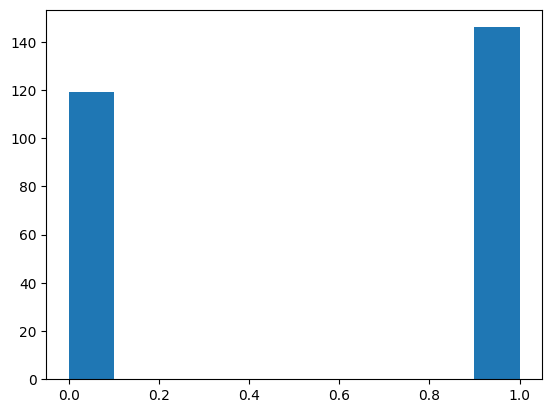

In [11]:
# We now plot the data using the histogram function
plt.hist(x)

In [13]:
# Let's check the output
df

,SMILES,Active
0,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc2c(=O)c(C(...,1
1,C=CC1=C(C(=O)O)N2C(=O)[C@H]([C@H]2SC1)NC(=O)/C...,1
2,CC(=O)NC1=CC=C(C=C1)C2=CSC(=N2)C3=CN=CC=C3,0
3,CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...,0
4,CC(=O)NCC(=O)N[C@@H](CC1=CC=CC=C1)C(=O)NC2(CCC...,0
...,...,...
260,CC[C@@H]1[C@](C)([C@@H]([C@@H](C)C(=O)[C@H](C)...,1
261,CC[C@@H]1[C@](C)([C@@H]([C@@H](C)N(C)C[C@H](C)...,0
262,C[C@@H]1CC(=O)[C@H](O)O[C@@H]([C@H]([C@@H]([C@...,0
263,C1CC1N2C=C(C(=O)C3=C2C=C(C(=C3)F)N4CCNCC4)C(=O)O,0


In [15]:
# We can print how many actives / inactives we have in our dataset
print("Total molecules: ", len(df))
print("Active molecules: ", len(df[df[EXP]==1]))
print("Inactive molecules: ", len(df[df[EXP]==0]))
print("Frequency of Actives (%): ", len(df[df[EXP]==1])/len(df)*100)

Total molecules:  265
Active molecules:  146
Inactive molecules:  119
Frequency of Actives (%):  55.094339622641506


## 4. Divide the data into Train and Test sets

To make sure our model will have good performance, we need to keep part of the data as a test set, to evaluate the model once trained.

Typically, it is good practice to reserve ~20% of the data as test set. Make sure that the balance of actives / inactives is maintained both in the train and the test sets

In [17]:
# We will use this function to split the data
# The function uses the sklearn train_test_split built-in method
from sklearn.model_selection import train_test_split
import numpy as np

def random_split(df, size):
    indices = np.arange(len(df))
    X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(df[SMILES], df[EXP], indices, test_size=size, stratify=df[EXP])
    train = df.iloc[i_train]
    test = df.iloc[i_test]
    return train, test

In [18]:
train, test = random_split(df, 0.2)

In [19]:
# Let's check the train set
train

,SMILES,Active
59,CN1C(=CN=C1SCCOC2=CC=C(C=C2)C(=O)O)[N+](=O)[O-...,1
235,CC1/C=C/C=C(/C)\C(=O)NC2=C(O)OC(=C(C(=CC(=C3C(...,1
141,CC1=CC=C(C(=C1)Cl)S(=O)(=O)N2B(C3=C(C=C(Br)S3)...,1
186,C1=CC(=C2C=NN(B(C2=C1)O)S(=O)(=O)C3=CC=C(C=C3)N)F,1
67,CN1C=CN=C1SCCOC2=CC=C(C=C2)[N+](=O)[O-],0
...,...,...
194,CC1=CC=C(C=C1)S(=O)(=O)N2B(C3=C(C=C(C)C=C3)C=N2)O,1
81,CC1=C(C(=O)/C=C/C2=CC=C(C=C2)Cl)SC(=N1)C3=CN=C...,0
244,COCC1=C(C(=O)O)N2C(=O)[C@H]([C@H]2SC1)NC(=O)/C...,1
93,CC1=C2C[C@](C)(C[C@H]2[C@@H](C(=C)C31CC3)O)CO,0


In [20]:
# Let's check the test set
test

,SMILES,Active
61,CN1C(=CN=C1SCCOC2=CC=C(C=C2)C(=O)O)[N+](=O)[O-],1
147,CC1=CC=C(C(=C1)Cl)S(=O)(=O)N2B(C3=C(C=N2)SC(=C...,1
9,CCCC/C=C/C(=O)N[C@@H](CC1=CC(=CC(=C1)F)F)C(=O)...,1
228,COC1=CC(=CC(=C1)C(=O)C2=CC=C(C=C2)O)O,0
226,COC1=CC=C(C=C1)C(=O)C2=CC(=CC(=C2)O)OC,0
133,CCCS(=O)(=O)N1C=CC2=C(B1O)SC(=C2)CC,1
14,CCCC/C=C/C(=O)N[C@@H](CC1=CC(=CC(=C1)F)F)C(=O)...,1
192,CC1=CC2=C(C=C1)B(N(N=C2)S(=O)(=O)N(C)C)O,1
151,COC(=O)C1=CC2=C(C(=C3C(=C2)C(CC4(CC5=C(C=C6C(=...,1
156,CC(=O)NCC1=CC=CC(=C1)C2=CSC(=N2)NC(=NCCC3=C(C=...,0


In [21]:
# We can make sure the active / inactive balance was preserved
train_balance = len(train[train[EXP]==1])/len(train)*100
test_balance = len(test[test[EXP]==1])/len(test)*100

print("The frequency of Actives in the train set is: ", train_balance)
print("The frequency of Actives in the test set is: ", test_balance)

The frequency of Actives in the train set is:  55.188679245283026
The frequency of Actives in the test set is:  54.71698113207547


In [22]:
# We can also save the train and test sets in case we want to explore them manually
# To save files, we use the pandas method "to_csv". Make sure to write the right path to your file if you are working locally

train.to_csv("train_set.csv", index=False)
test.to_csv("test_set.csv", index=False)

## 5. Featurization of molecules

The next step is to convert the molecules in our train set to vectors so that we can pass them as input for the machine learning model.
We will first use the most used fingerprint, the Morgan Descriptors, which can be easily calculated using RdKit.

In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Create the molecules from the SMILES string
smiles = train[SMILES]  # Replace this with your own SMILES string
mols = [Chem.MolFromSmiles(smi) for smi in smiles]


In [29]:
# Filter out None molecules
valid_mols = [mol for mol in mols if mol is not None]

# Specify the radius and number of bits for Morgan fingerprint
radius = 3
nBits = 2048

# Generate Morgan fingerprints for valid molecules
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits) for mol in valid_mols]
morgan_fps_train = [np.array(list(fp.ToBitString())).astype(int) for fp in fps]


In [30]:
#Let's check the outcome!
morgan_fps_train

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0,

_* We have individually created the descriptors so that we can check how they look like. Luckily, LazyQSAR provides a single funtion to convert the smiles to vectors and train an ML model, so we will use that feature_

## 6. Train an ML model

We have our input (morgan descriptors) and the endpoint, the activity in binary format (1 or 0) so we are ready to train a classifier!
We will use the built-in method in LazyQSAR

In [33]:
import lazyqsar as lq

# Filter out rows with None or invalid SMILES
train = train.dropna(subset=['SMILES'])
train = train[train['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) is not None)]

# Separate features (SMILES) and target variable (EXP)
smiles_train = train[SMILES]
y_train = train[EXP]

# Initialize and fit the model
model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
model.fit(smiles_train, y_train)


[flaml.automl.logger: 01-07 23:40:30] {1679} INFO - task = classification
[flaml.automl.logger: 01-07 23:40:30] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-07 23:40:30] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 01-07 23:40:30] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost']
[flaml.automl.logger: 01-07 23:40:30] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 01-07 23:40:30] {2344} INFO - Estimated sufficient time budget=334s. Estimated necessary time budget=0s.
[flaml.automl.logger: 01-07 23:40:30] {2391} INFO -  at 0.1s,	estimator rf's best error=0.4000,	best estimator rf's best error=0.4000
[flaml.automl.logger: 01-07 23:40:30] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-07 23:40:30] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.3364,	best estimator lgbm's best error=0.3364
[flaml.automl.logger: 01-07 23:40:30] {2218} INFO - iteration 2, current learn

## 7. Evaluate the model performance

After fitting the model, we need to evaluate how good it works on the test set. For that, we will run the model to make predictions with the test data and compare it to the real values.

In [36]:
# Filter out rows with None or invalid SMILES
test = test.dropna(subset=['SMILES'])
test = test[test['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) is not None)]

# Separate features (SMILES) for testing
smiles_test = test[SMILES]

# Predict probabilities using the trained model
y_hat = model.predict_proba(smiles_test)
y_hat


array([[0.47388548, 0.5261145 ],
       [0.46826404, 0.53173596],
       [0.48316288, 0.5168371 ],
       [0.48316288, 0.5168371 ],
       [0.47238296, 0.52761704],
       [0.47238296, 0.52761704],
       [0.46904534, 0.53095466],
       [0.48316288, 0.5168371 ],
       [0.48316288, 0.5168371 ],
       [0.46785247, 0.5321475 ],
       [0.47388548, 0.5261145 ],
       [0.48316288, 0.5168371 ],
       [0.47315228, 0.5268477 ],
       [0.48032445, 0.51967555],
       [0.46904534, 0.53095466],
       [0.48316288, 0.5168371 ],
       [0.47273135, 0.52726865],
       [0.476959  , 0.523041  ],
       [0.48111278, 0.5188872 ],
       [0.48111278, 0.5188872 ],
       [0.48316288, 0.5168371 ],
       [0.46826404, 0.53173596],
       [0.47388548, 0.5261145 ],
       [0.46826404, 0.53173596],
       [0.46826404, 0.53173596],
       [0.48316288, 0.5168371 ],
       [0.46904534, 0.53095466],
       [0.4762177 , 0.5237823 ],
       [0.48316288, 0.5168371 ],
       [0.47388548, 0.5261145 ],
       [0.

In [37]:
# We get two results for each molecule, why?
# We only want to keep the probability of Active (1), the second column
y_hat = y_hat[:,1]
y_hat

array([0.5261145 , 0.53173596, 0.5168371 , 0.5168371 , 0.52761704,
       0.52761704, 0.53095466, 0.5168371 , 0.5168371 , 0.5321475 ,
       0.5261145 , 0.5168371 , 0.5268477 , 0.51967555, 0.53095466,
       0.5168371 , 0.52726865, 0.523041  , 0.5188872 , 0.5188872 ,
       0.5168371 , 0.53173596, 0.5261145 , 0.53173596, 0.53173596,
       0.5168371 , 0.53095466, 0.5237823 , 0.5168371 , 0.5261145 ,
       0.51834595, 0.5168371 , 0.53095466, 0.51967555, 0.5268477 ,
       0.53173596, 0.52771413, 0.53173596, 0.53173596, 0.52063715,
       0.5191722 , 0.5168371 ], dtype=float32)

### The ROC-AUC curve

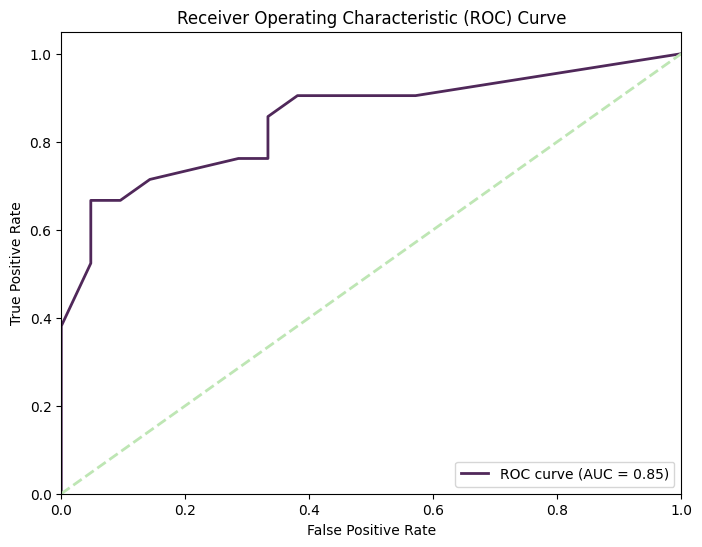

In [38]:
from sklearn.metrics import roc_curve, auc

# We need the real results, the activity of the test set
y_test = test[EXP]

# We use the sklearn package to calculate the roc_curve and plot it
fpr, tpr, _ = roc_curve(y_test, y_hat)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#50285a', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='#bee6b4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### The Contingency table

The contingency table tells us how many molecules will be correctly predicted and how many will be false positives or false negatives.

For that, we need to convert the continuous model output (probabilities) to a binary outcome (1 or 0) using the cut-off we decide between 0 and 1. Typically, the cut-off is assigned at 0.5.

[Text(0, 0.5, 'Inactive'), Text(0, 1.5, 'Active')]

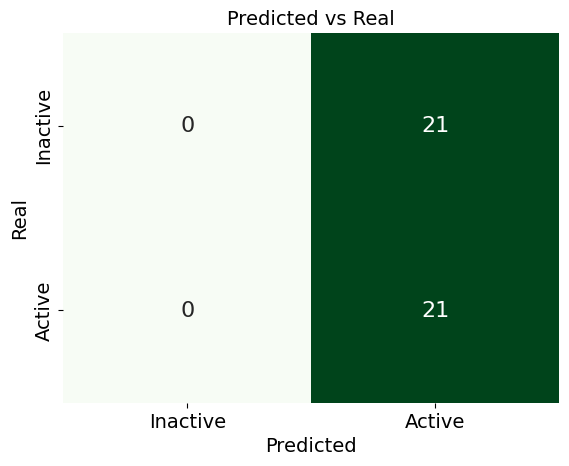

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

proba_cutoff = 0.5
y_hat_bin = [1 if x >= proba_cutoff else 0 for x in y_hat]


cf_matrix = confusion_matrix(y_test, y_hat_bin)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Inactive','Active'], fontsize=14)
ax.yaxis.set_ticklabels(['Inactive','Active'], fontsize=14)

### The Classification Report

Sklearn can automatically provide a report with the measures of precision and recall for each class

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_bin))

## 7. Save the model
If we want to reuse our model, we need to save it so it can be applied to new data!

In [ ]:
model.save("model_morgan.joblib")

## 8. What could we do to improve model performace?
- Use more time for training
- Try another featurizer method
- ...

In this example, we will test and evaluate another method for featurizing, the Ersilia Compound Embeddings.

In [ ]:
# Train a model using LazyQSAR and evaluate its performance

import lazyqsar as lq

smiles_train = train[SMILES]
y_train = train[BIN]

model = lq.ErsiliaBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
model.fit(smiles_train, y_train)

In [ ]:
y_hat

In [ ]:
smiles_test = test[SMILES]

y_hat = model.predict_proba(smiles_test)[:,1]
# We need the real results, the activity of the test set
y_test = test[BIN]

# We use the sklearn package to calculate the roc_curve and plot it
fpr, tpr, _ = roc_curve(y_test, y_hat)
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#50285a', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='#bee6b4', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
proba_cutoff = 0.5
y_hat_bin = [1 if x >= proba_cutoff else 0 for x in y_hat]

cf_matrix = confusion_matrix(y_test, y_hat_bin)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Inactive','Active'], fontsize=14)
ax.yaxis.set_ticklabels(['Inactive','Active'], fontsize=14)

In [ ]:
print(classification_report(y_test,y_hat_bin))

In [ ]:
model.save("model_eosce.joblib")

## 9. Save the final model

To ensure we use all possible data, at the end of the pipeline we will train the model with the whole dataset (train and test) and save it as the final model for deployment.

We need to choose which descriptor and parameters will work better for our case and build the model accordingly. We obtain that from the best train-test experiment.

In [ ]:
# train the model with the full data

# load the whole dataset

df = pd.read_csv(filename)

# binarize the activity if needed
SMILES = "SMILES"
EXP = "pIC50"
BIN = "bin"

direction = "lower"
cutoff = 2.5

if direction == "lower":
    df[BIN] = [1 if x <= cutoff else 0 for x in df[EXP]]
elif direction == "higher":
    df[BIN] = [1 if x >= cutoff else 0 for x in df[EXP]]
else:
    print("no direction specified. Please select lower or higher direction for the activity cut-off")

# train the selected model
import lazyqsar as lq
smiles_train = df[SMILES]
y_train = df[BIN]
model = lq.MorganBinaryClassifier(time_budget_sec=60, estimator_list=["rf", "lgbm", "xgboost"])
model.fit(smiles_train, y_train)
model.save("final_model.joblib")